**Assignment-6**

**Name**- Prashant Singh

**Enrollment No.**- SAU/CS/Mtech(CS)/2024/04

**Course**- Data Mining

**Question**:
 Implement DBSCAN.


**Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


**Implementing DBSCAN**

In [2]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def find_neighbors(data, current_index, epsilon):
    neighbors = []
    for i in range(len(data)):
        if euclidean_distance(data[current_index], data[i]) < epsilon:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, cluster_labels, current_index, cluster_id, epsilon, min_points):
    neighbors = find_neighbors(data, current_index, epsilon)
    if len(neighbors) < min_points:
        cluster_labels[current_index] = -1
        return False
    cluster_labels[current_index] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor_index = neighbors[i]
        if cluster_labels[neighbor_index] == -1:
            cluster_labels[neighbor_index] = cluster_id
        elif cluster_labels[neighbor_index] == 0:
            cluster_labels[neighbor_index] = cluster_id
            neighbor_neighbors = find_neighbors(data, neighbor_index, epsilon)
            if len(neighbor_neighbors) >= min_points:
                neighbors += neighbor_neighbors
        i += 1
    return True

def dbscan(data, epsilon, min_points):
    cluster_labels = np.zeros(len(data))
    cluster_id = 0
    for point_index in range(len(data)):
        if cluster_labels[point_index] != 0:
            continue
        if expand_cluster(data, cluster_labels, point_index, cluster_id + 1, epsilon, min_points):
            cluster_id += 1
    return cluster_labels


**Loading Data**

In [3]:
iris = load_iris()
data = iris.data
epsilon = 0.5
min_points = 5
cluster_labels = dbscan(data, epsilon, min_points)


**Visualization**

<ipython-input-4-542e0e8ab9fe>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('tab10')(cluster % 10)


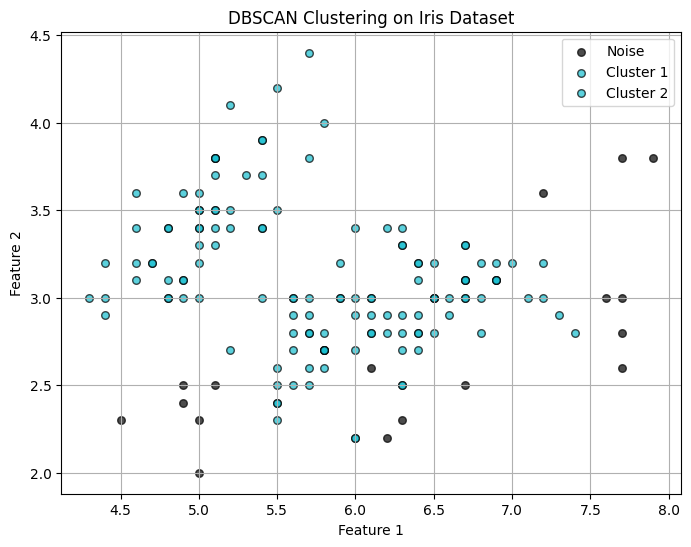

In [4]:
plt.figure(figsize=(8, 6))
unique_clusters = np.unique(cluster_labels)
for cluster in unique_clusters:
    if cluster == -1:
        color = 'k'
        cluster_name = 'Noise'
    else:
        color = plt.cm.get_cmap('tab10')(cluster % 10)
        cluster_name = f'Cluster {int(cluster)}'
    cluster_data = data[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=color, label=cluster_name, edgecolors='k', s=30, alpha=0.7)
plt.title("DBSCAN Clustering on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


**Output**

In [5]:
num_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)
num_noise_points = np.sum(cluster_labels == -1)
print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")


Number of clusters: 2
Number of noise points: 17
